## ▶️ EDA

Kaggle Link: https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset/data

In [572]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

# Seaborn-formatting
sns.set(style="whitegrid")

# supress warnings
import warnings
warnings.filterwarnings("ignore")

# display all columns
pd.set_option('display.max_columns', None)

In [573]:
df = pd.read_excel('../Datasets/FlightPricePrediction/Data_Train.xlsx', sheet_name='Sheet1', parse_dates=True)

In [574]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [575]:
print('Shape:', df.shape, f'| Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Shape: (10683, 11) | Rows: 10683, Columns: 11


In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Dtype needs to be changed!

In [577]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Have null values!

In [578]:
have_null_values = [col for col in df.columns if df[col].isnull().sum()>0]
print('All columns with null values: ', have_null_values)

All columns with null values:  ['Route', 'Total_Stops']


In [579]:
# Fill null with mode
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [580]:
have_null_values = [col for col in df.columns if df[col].isnull().sum()>0]
print('All columns with null values: ', have_null_values)

All columns with null values:  []


In [581]:
df.duplicated().sum()

220

Have duplicates!

In [582]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [583]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [584]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [585]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [586]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [587]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [588]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.time

In [589]:
df['departure_datetime'] = pd.to_datetime(df['Date_of_Journey'].astype(str) + ' ' + df['Dep_Time'].astype(str))

In [590]:
# Function to convert time string to timedelta
def parse_duration(duration_str):
    parts = duration_str.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part[:-1]) * 60
        elif 'm' in part:
            total_minutes += int(part[:-1])
    return pd.Timedelta(minutes=total_minutes)

In [591]:
df['Duration'] = df['Duration'].apply(parse_duration)

In [592]:
df['Duration'].head()

0   0 days 02:50:00
1   0 days 07:25:00
2   0 days 19:00:00
3   0 days 05:25:00
4   0 days 04:45:00
Name: Duration, dtype: timedelta64[ns]

In [593]:
df['arrival_datetime'] = df['departure_datetime'] + df['Duration']

In [594]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,departure_datetime,arrival_datetime
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10 22 Mar,0 days 02:50:00,0,No info,3897,2019-03-24 22:20:00,2019-03-25 01:10:00
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15,0 days 07:25:00,2,No info,7662,2019-01-05 05:50:00,2019-01-05 13:15:00
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25 10 Jun,0 days 19:00:00,2,No info,13882,2019-09-06 09:25:00,2019-09-07 04:25:00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30,0 days 05:25:00,1,No info,6218,2019-12-05 18:05:00,2019-12-05 23:30:00
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35,0 days 04:45:00,1,No info,13302,2019-01-03 16:50:00,2019-01-03 21:35:00


In [595]:
df = df.drop(['Dep_Time', 'Arrival_Time'], axis=1)

In [596]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,departure_datetime,arrival_datetime
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,0 days 02:50:00,0,No info,3897,2019-03-24 22:20:00,2019-03-25 01:10:00
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 07:25:00,2,No info,7662,2019-01-05 05:50:00,2019-01-05 13:15:00
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,0 days 19:00:00,2,No info,13882,2019-09-06 09:25:00,2019-09-07 04:25:00
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,0 days 05:25:00,1,No info,6218,2019-12-05 18:05:00,2019-12-05 23:30:00
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,0 days 04:45:00,1,No info,13302,2019-01-03 16:50:00,2019-01-03 21:35:00


In [597]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

'No Info' and 'No info' can me made same!

In [598]:
df['Additional_Info'] = df['Additional_Info'].apply(lambda x:'No Info' if x=='No info' else x)

In [599]:
def time_slot(time_value):
    time_obj = time_value.time()
    
    if time_obj >= pd.Timestamp('00:00:00').time() and time_obj <= pd.Timestamp('06:00:00').time():
        return '12AM to 6AM'
    elif time_obj > pd.Timestamp('06:00:00').time() and time_obj <= pd.Timestamp('12:00:00').time():
        return '6AM to 12PM'
    elif time_obj > pd.Timestamp('12:00:00').time() and time_obj <= pd.Timestamp('18:00:00').time():
        return '12 PM to 6PM'
    else:
        return '6PM to 12AM'

In [600]:
df['departure_slot'] = df['departure_datetime'].apply(time_slot)
df['arrival_slot'] = df['arrival_datetime'].apply(time_slot)

In [601]:
df['day_of_departure'] = df['departure_datetime'].dt.strftime('%A')
df['day_of_arrival'] = df['arrival_datetime'].dt.strftime('%A')

In [602]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,departure_datetime,arrival_datetime,departure_slot,arrival_slot,day_of_departure,day_of_arrival
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,0 days 02:50:00,0,No Info,3897,2019-03-24 22:20:00,2019-03-25 01:10:00,6PM to 12AM,12AM to 6AM,Sunday,Monday
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 07:25:00,2,No Info,7662,2019-01-05 05:50:00,2019-01-05 13:15:00,12AM to 6AM,12 PM to 6PM,Saturday,Saturday
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,0 days 19:00:00,2,No Info,13882,2019-09-06 09:25:00,2019-09-07 04:25:00,6AM to 12PM,12AM to 6AM,Friday,Saturday
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,0 days 05:25:00,1,No Info,6218,2019-12-05 18:05:00,2019-12-05 23:30:00,6PM to 12AM,6PM to 12AM,Thursday,Thursday
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,0 days 04:45:00,1,No Info,13302,2019-01-03 16:50:00,2019-01-03 21:35:00,12 PM to 6PM,6PM to 12AM,Thursday,Thursday


In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Airline             10463 non-null  object         
 1   Date_of_Journey     10463 non-null  datetime64[ns] 
 2   Source              10463 non-null  object         
 3   Destination         10463 non-null  object         
 4   Route               10463 non-null  object         
 5   Duration            10463 non-null  timedelta64[ns]
 6   Total_Stops         10463 non-null  int64          
 7   Additional_Info     10463 non-null  object         
 8   Price               10463 non-null  int64          
 9   departure_datetime  10463 non-null  datetime64[ns] 
 10  arrival_datetime    10463 non-null  datetime64[ns] 
 11  departure_slot      10463 non-null  object         
 12  arrival_slot        10463 non-null  object         
 13  day_of_departure    10463 non-n

In [604]:
independent_column = ['Price']
all_dependent_columns = [column for column in list(df.columns) if column not in dependent_column]

print('>>> dependent_column: \n\t', dependent_column)
print('>>> all_dependent_columns: \n\t', all_dependent_columns)

>>> dependent_column: 
	 ['Price']
>>> all_dependent_columns: 
	 ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Additional_Info', 'departure_datetime', 'arrival_datetime', 'departure_slot', 'arrival_slot', 'day_of_departure', 'day_of_arrival']


In [605]:
for col in all_dependent_columns:
    print(f'>> Unique categories in "{col}":', len(df[col].unique()))

>> Unique categories in "Airline": 12
>> Unique categories in "Date_of_Journey": 40
>> Unique categories in "Source": 5
>> Unique categories in "Destination": 6
>> Unique categories in "Route": 128
>> Unique categories in "Duration": 368
>> Unique categories in "Total_Stops": 5
>> Unique categories in "Additional_Info": 9
>> Unique categories in "departure_datetime": 4158
>> Unique categories in "arrival_datetime": 4121
>> Unique categories in "departure_slot": 4
>> Unique categories in "arrival_slot": 4
>> Unique categories in "day_of_departure": 7
>> Unique categories in "day_of_arrival": 7


### Visulizations

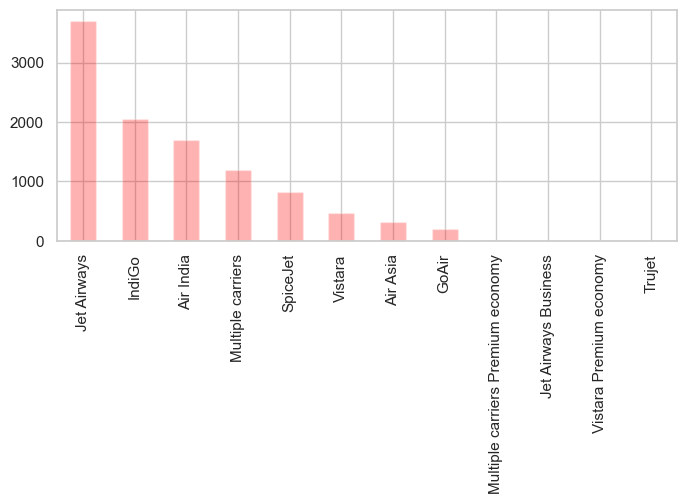

In [606]:
# Most popular Airline

plt.figure(figsize=(8,3))
df['Airline'].value_counts().plot(kind='bar', color='red', alpha=0.3);

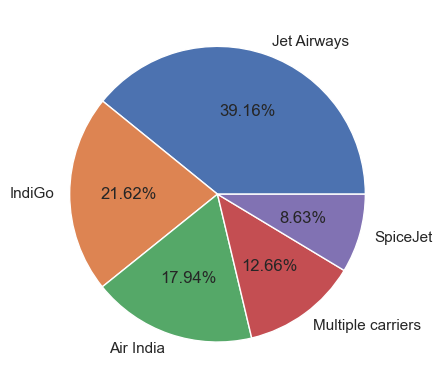

In [607]:
# Top-5 Airline market share

plt.pie(df['Airline'].value_counts().values[:5], labels=df['Airline'].value_counts().index[:5], autopct='%1.2f%%');

Variation of price across Airlines: 



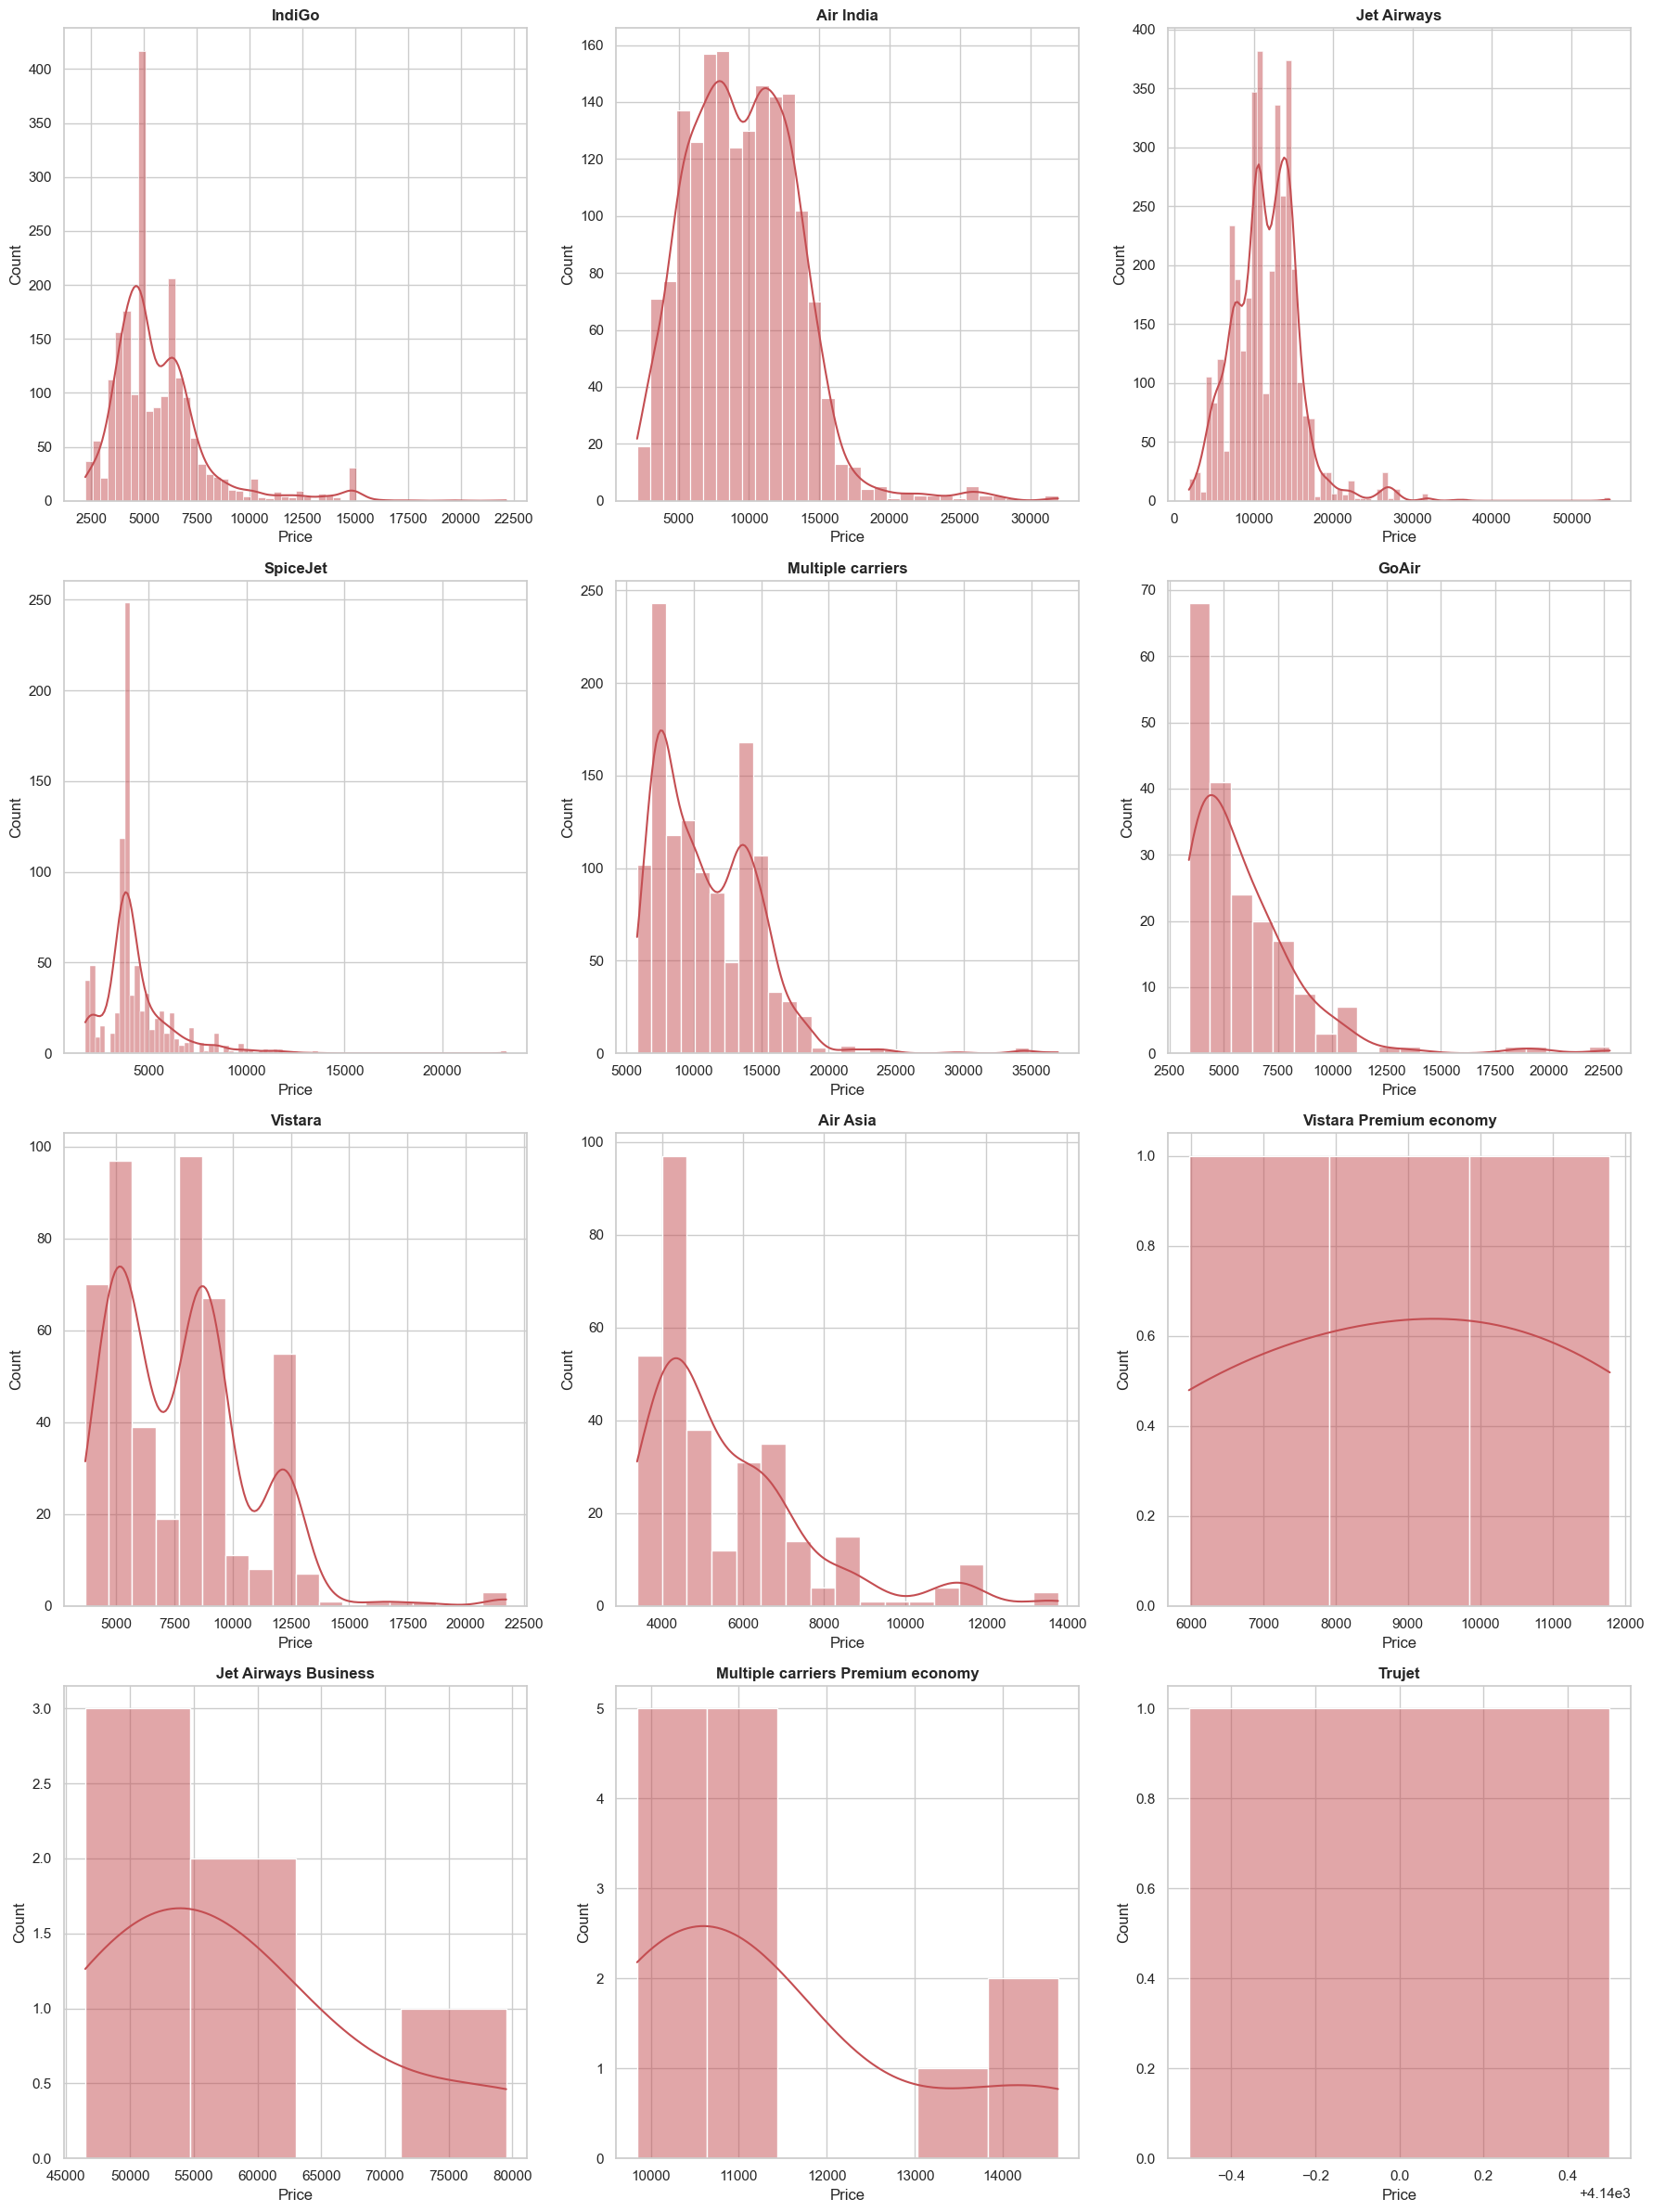

In [608]:
# Price distribution across airline

print('Variation of price across Airlines: \n')
fig, axis = plt.subplots(4,3, figsize=(18,24))

all_airlines = list(df['Airline'].unique())
for i, ax in enumerate(axis.flatten()):
    if i < len(all_airlines):
        airline_df = df[df['Airline'] == all_airlines[i]]
        sns.histplot(data=airline_df, x='Price', ax=ax, color='r', kde=True)
        ax.set_title(all_airlines[i], fontsize=12, fontweight='bold') 
plt.tight_layout()
plt.show()

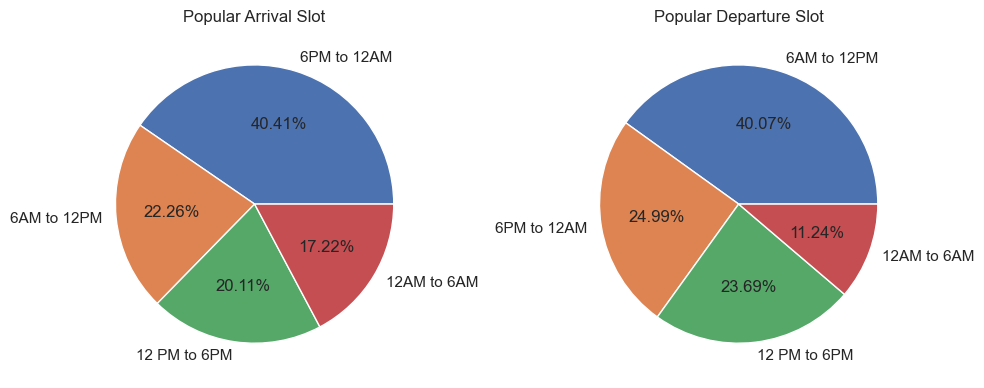

In [609]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the pie chart for 'arrival_slot'
axes[0].pie(df['arrival_slot'].value_counts(), labels=df['arrival_slot'].value_counts().index, autopct='%1.2f%%')
axes[0].set_title('Popular Arrival Slot')

# Plot the pie chart for 'departure_slot'
axes[1].pie(df['departure_slot'].value_counts(), labels=df['departure_slot'].value_counts().index, autopct='%1.2f%%')
axes[1].set_title('Popular Departure Slot')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

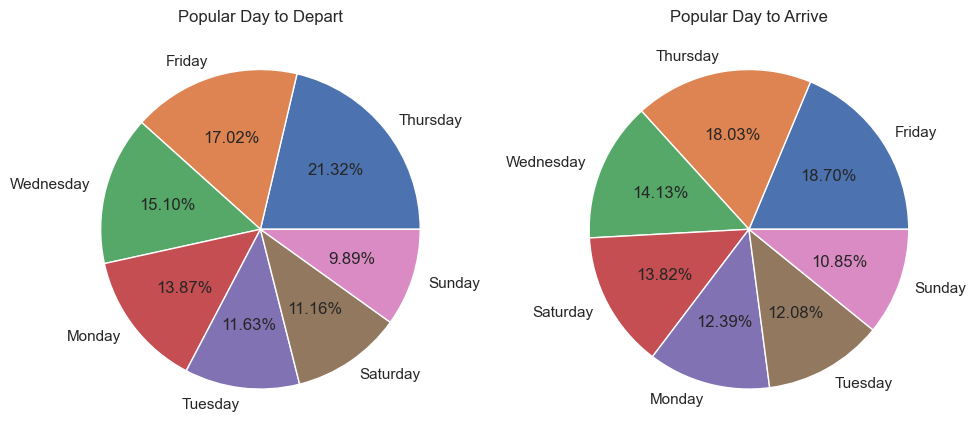

In [610]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the pie chart for 'departure_day'
axes[0].pie(df['day_of_departure'].value_counts(), labels=df['day_of_departure'].value_counts().index, autopct='%1.2f%%')
axes[0].set_title('Popular Day to Depart')

# Plot the pie chart for 'arrive_day'
axes[1].pie(df['day_of_arrival'].value_counts(), labels=df['day_of_arrival'].value_counts().index, autopct='%1.2f%%')
axes[1].set_title('Popular Day to Arrive')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [616]:
def get_central_price(df, columns, centrality):
    central_price_combined = {}
    
    for col in columns:
        central_prices = {}
        
        types = list(df[col].unique())
        for a_type in types:
            if centrality == 'mean':
                central_price = df[df[col] == a_type]['Price'].mean()
                central_prices[a_type] = central_price
            elif centrality == 'median':
                central_price = df[df[col] == a_type]['Price'].median()
                central_prices[a_type] = central_price    
        items = central_prices
        
        central_price_combined[col] = items
    
    return central_price_combined

In [618]:
median_purchase_prices = get_central_price(df, columns=['day_of_departure', 'day_of_arrival', 'arrival_slot', 'departure_slot',], centrality='median')

Variation of median price across each category in a feature: 



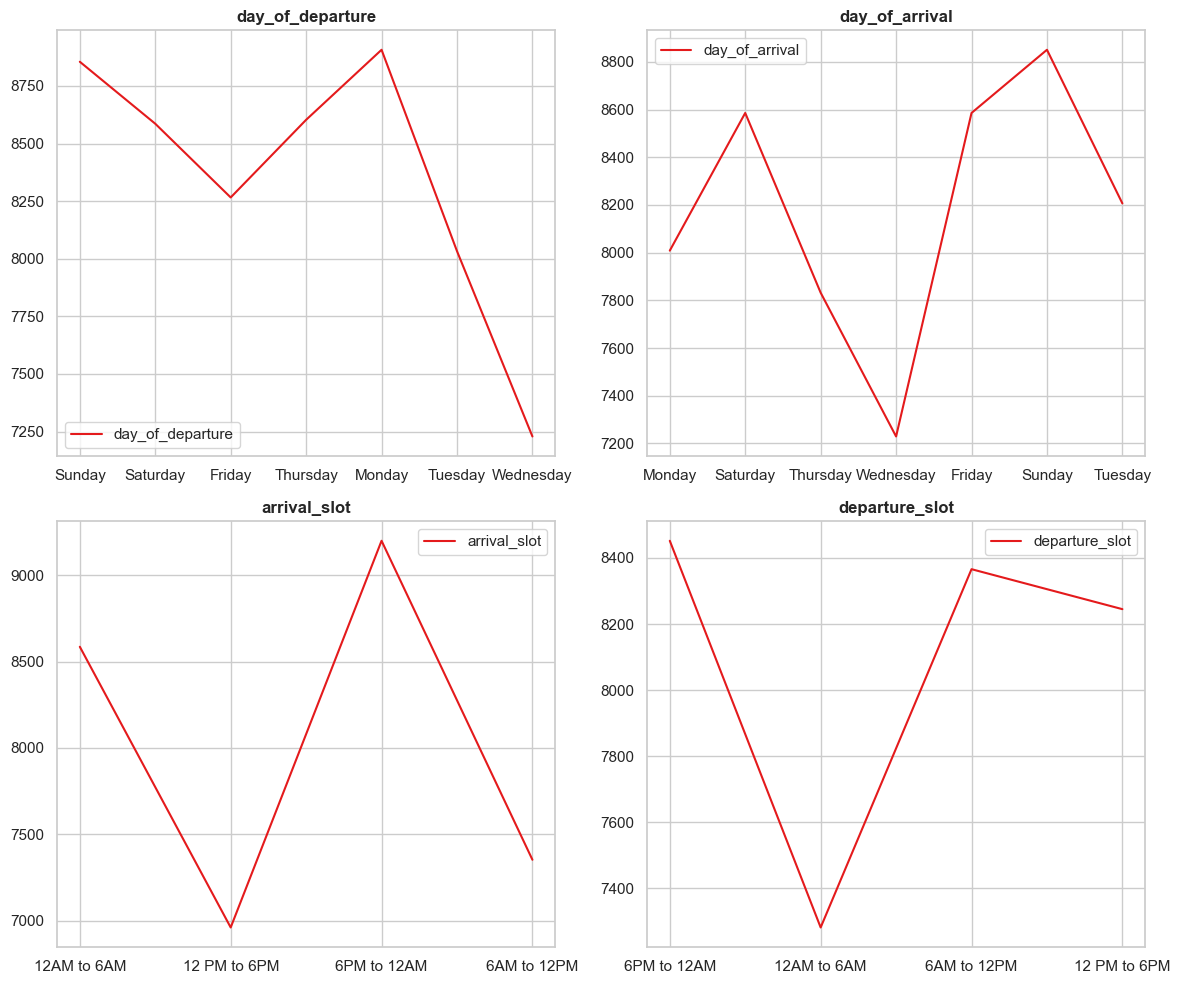

In [633]:
print('Variation of median price across each category in a feature: \n')
fig, axis = plt.subplots(2,2, figsize=(12,10))

all_cols = list(median_purchase_prices.keys())
for i, ax in enumerate(axis.flatten()):
    if i < len(all_cols):
        median_price_df = pd.DataFrame.from_dict(median_purchase_prices[all_cols[i]], orient='index', columns=[all_cols[i]])
        sns.lineplot(data=median_price_df, ax=ax, palette='Set1')
        ax.set_title(all_cols[i], fontsize=12, fontweight='bold') 
plt.tight_layout()
plt.show()